In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm

In [3]:
df = pd.read_csv("data/Krushing Kingdoms.csv")
df.head()

,id,team_level_access,minutes_played,day1_retention,day7_retention
0,250642234,level_5,21,True,False
1,330729049,level_5,1,False,False
2,955307973,level_7,76,True,True
3,908651903,level_7,76,True,False
4,983320188,level_5,1,False,False


### Define Hypothesis

**Null Hypothesis**: There is no difference in retention between the two groups \
**Alternative Hypothesis**: There is a difference in the mean retention between the 2 groups

### EDA

In [4]:
df.describe()

,id,minutes_played
count,5.000000e+04,50000.000000
mean,5.000967e+08,25.884040
std,2.894632e+08,51.130086
min,7.746000e+03,0.000000
25%,2.502251e+08,3.000000
50%,5.008450e+08,8.000000
75%,7.500803e+08,26.000000
max,9.999952e+08,1481.000000


In [5]:
grouped = df.groupby('team_level_access').agg({'minutes_played': ['mean', 'median'],
                                               'day1_retention': 'mean',
                                               'day7_retention': 'mean'})
print(grouped)

                  minutes_played        day1_retention day7_retention
                            mean median           mean           mean
team_level_access                                                    
level_5                26.038934    9.0       0.448304       0.189176
level_7                25.732092    8.0       0.441561       0.181537


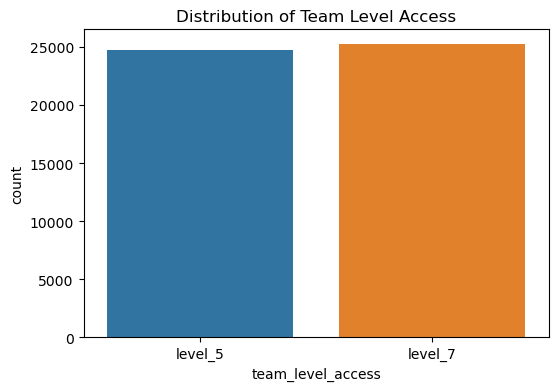

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='team_level_access', data=df)
plt.title('Distribution of Team Level Access')
plt.show()

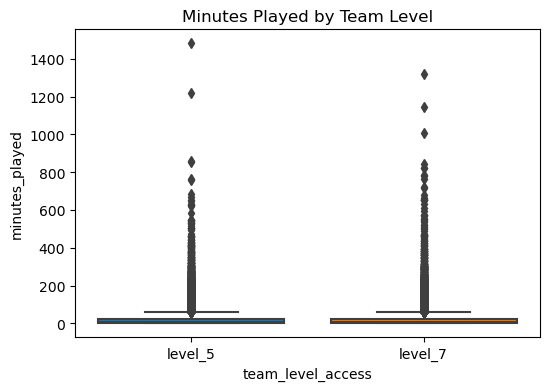

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='team_level_access', y='minutes_played', data=df)
plt.title('Minutes Played by Team Level')
plt.show()

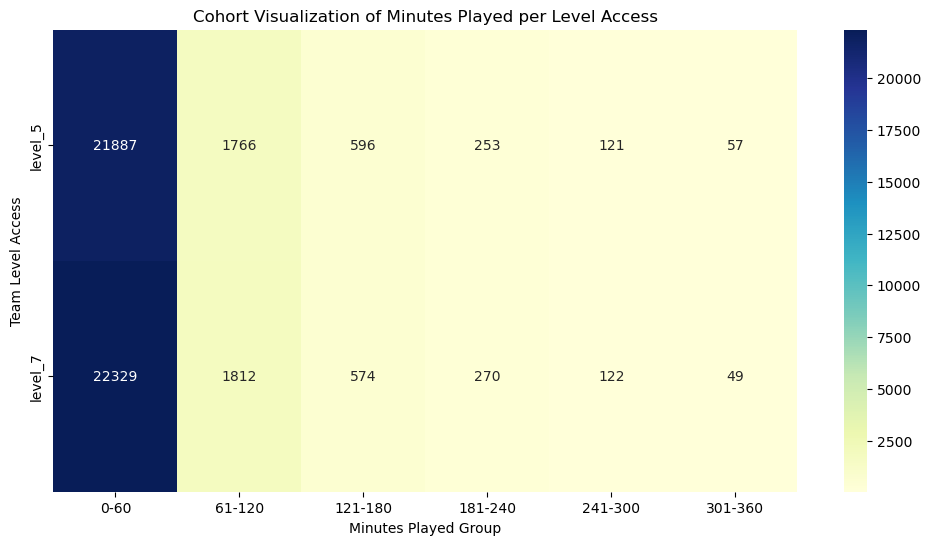

In [8]:
bins = [0, 60, 120, 180, 240, 300, 360]
labels = ['0-60', '61-120', '121-180', '181-240', '241-300', '301-360']
df['minutes_played_group'] = pd.cut(df['minutes_played'],
                                    bins=bins, labels=labels, right=False)

cohort_data = df.pivot_table(index='team_level_access',
                             columns='minutes_played_group',
                             aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(cohort_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Cohort Visualization of Minutes Played per Level Access')
plt.xlabel('Minutes Played Group')
plt.ylabel('Team Level Access')
plt.show()

### Outliers

<AxesSubplot:>

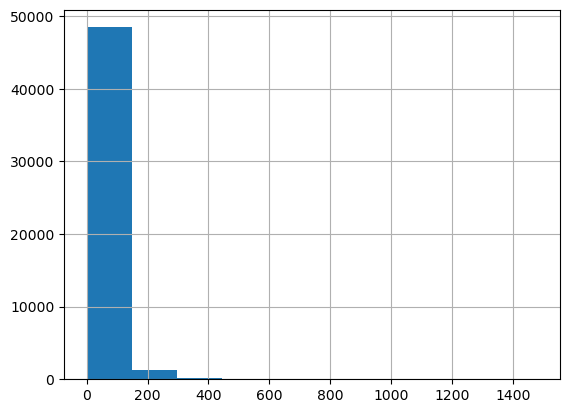

In [9]:
df.minutes_played.hist()

In [12]:
df.describe()

,id,minutes_played
count,5.000000e+04,50000.000000
mean,5.000967e+08,25.884040
std,2.894632e+08,51.130086
min,7.746000e+03,0.000000
25%,2.502251e+08,3.000000
50%,5.008450e+08,8.000000
75%,7.500803e+08,26.000000
max,9.999952e+08,1481.000000


In [10]:
Q1 = df['minutes_played'].quantile(0.25)
Q3 = df['minutes_played'].quantile(0.75)
IQR = Q3 - Q1

In [11]:
outliers = ((df['minutes_played'] < (Q1 - 1.5 * IQR)) | (df['minutes_played'] > (Q3 + 1.5 * IQR)))
df_cleaned = df[~outliers]
df_cleaned.describe()

,id,minutes_played
count,4.431900e+04,44319.000000
mean,4.993766e+08,12.208240
std,2.893929e+08,13.750095
min,7.746000e+03,0.000000
25%,2.491266e+08,2.000000
50%,5.000784e+08,7.000000
75%,7.496319e+08,17.000000
max,9.999952e+08,60.000000
